# Install Python Control Systems Library

In [ ]:
pip install control

In [ ]:
import control
import matplotlib.pyplot as plt

In [ ]:
# Define transfer function of the system
s = control.tf('s')

# Process + Non Ideal Sensor -> Feedback Controler

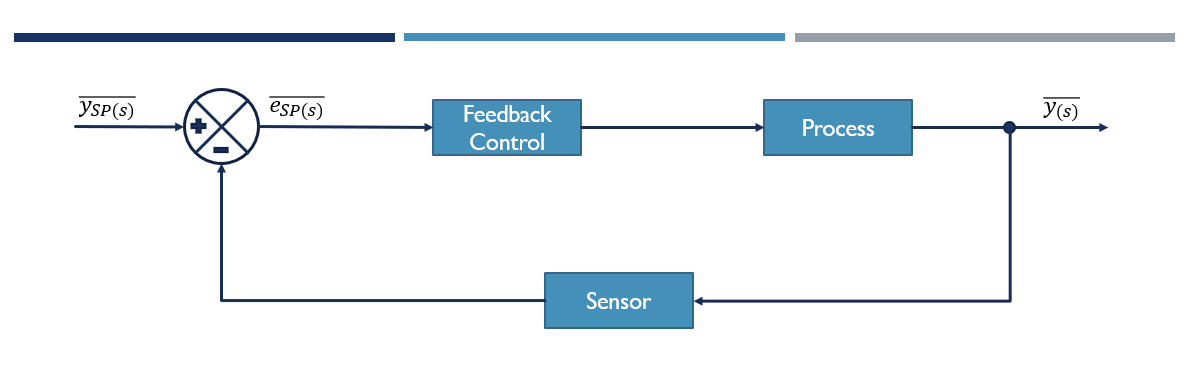

## Sensor Step Response

In [ ]:
Kp_Sensor = 1
Tau_Sensor = 10
Sensor_Transfer_Function  = Kp_Sensor/(Tau_Sensor*s + 1)

In [ ]:
# Simulate Sensor step response
t_sensor, y_sensor = control.step_response(Sensor_Transfer_Function)

In [ ]:
# Plot step response
plt.plot(t_sensor, y_sensor)
plt.plot([Tau_Sensor, Tau_Sensor], [0, 0.632], 'r--')
plt.plot([0, Tau_Sensor], [0.632, 0.632], 'r--')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Sensor Step Response')
plt.grid()
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

## Process + Controller

In [ ]:
Kp= 70.0
Tau= 320.0
FO  = Kp/(Tau*s + 1)

In [ ]:
Delay= 58.0
num, den = control.pade(Delay, n=2, numdeg=0)
Pade = control.tf(num, den)

In [ ]:
FOPDT = control.series(FO, Pade)

In [ ]:
# Define transfer function of the PID controller
Kc = 0.1
ti = 119.0
td = 30.0
# Define transfer function of the PID Controller
Controller = Kc*(1 + (1/(ti*s)) + (td*s))

In [ ]:
Sys_Control = control.series(Controller, FOPDT)

## Feedback Step Response

In [ ]:
sys = control.feedback(Sys_Control, Sensor_Transfer_Function, sign=-1)

In [ ]:
# Simulate step response
t, y = control.step_response(sys)

In [ ]:
# Plot step response
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('System Step Response')
plt.grid()
plt.show()